#Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Pre-defined Functions

`Search_Null`:- This fucntion will provide you a dictionary(key:- feature, value:- [list of row]), if any null or nan value exists in your dataset. You just have to provide the data as the parameter.
<br><br>

`divide_dataset`:- This function will help you to split your dataset. You have to provide the dataset, the percentage of the spliting data and random state. If you want a small dataset of 10% of your real dataset, you have to pass 0.1 in percentage parameter. Random state initialy set at 1. Thats mean it will split your data randomly. 
<br>
<font color='coral'>NOTE:-</font> Please, after spliting, check your datashape and target column's value.count() are suitable or not for your training phase.

In [4]:
def Search_Null(dataset):
  d={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == "nan":
        rows.append(row)
        flage = 1
    if flage ==1:
      d[col] = rows
  
  return d


def divide_dataset(dataset,percentage,randomly = 1):

  rows,cols = dataset.shape

  if randomly == 0:
    return dataset.iloc[:int(rows*(percentage)),:]
  else:
    import random
    l_r = random.sample(range(0, rows), int(rows*(percentage)))
    return dataset.iloc[l_r,:]

#numpy and pandas

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare.xlsx')

target="Type"

In [5]:
Search_Null(dataset)

{}

In [3]:
dataset.head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0    Subject       Type      Cycle       Time       RR-I         HR   
1         E1   ischemic          1      1.072      0.932  64.377682   
2         E1   ischemic          2      2.004      1.004  59.760956   
3         E1   ischemic          3      3.008      0.996  60.240964   
4         E1   ischemic          4      4.004      1.016  59.055118   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0        R-H        P-H        QRS        PRQ          QT         QTC   
1      3.305       3.81      0.088       0.16       0.384    0.397762   
2      3.285       3.81        0.1       0.16        0.64    0.638724   
3       3.34       3.83      0.128      0.148       0.628     0.62926   
4      3.325       3.81      0.108      0.172       0.388    0.384933   

  Unnamed: 12  
0          ST  
1       0.296  
2        0.54  
3         0.5  
4        0.28

<font color='coral'>Msg:- </font>In the above cell, there are some unwanted columns were appeared. So in the below,the unwanted columns were removed and the desire columns have been set.

In [22]:
dataset.columns = dataset.iloc[0]   #columns have been set as index 0
dataset = dataset[1:]               #new dataset index starts from index 1

#do not run this cell twice

In [23]:
dataset.head()

0 Subject      Type Cycle   Time   RR-I         HR    R-H    P-H    QRS  \
1      E1  ischemic     1  1.072  0.932  64.377682  3.305   3.81  0.088   
2      E1  ischemic     2  2.004  1.004  59.760956  3.285   3.81    0.1   
3      E1  ischemic     3  3.008  0.996  60.240964   3.34   3.83  0.128   
4      E1  ischemic     4  4.004  1.016  59.055118  3.325   3.81  0.108   
5      E1  ischemic     5   5.02  0.972  61.728395   3.29  3.765    0.1   

0    PRQ     QT       QTC     ST  
1   0.16  0.384  0.397762  0.296  
2   0.16   0.64  0.638724   0.54  
3  0.148  0.628   0.62926    0.5  
4  0.172  0.388  0.384933   0.28  
5   0.16  0.372   0.37732  0.272

In [24]:
dataset.shape

(1048574, 13)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 1 to 1048574
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Subject  1048574 non-null  object
 1   Type     1048574 non-null  object
 2   Cycle    1048574 non-null  object
 3   Time     1048574 non-null  object
 4   RR-I     1048574 non-null  object
 5   HR       1048574 non-null  object
 6   R-H      1048574 non-null  object
 7   P-H      1048574 non-null  object
 8   QRS      1048574 non-null  object
 9   PRQ      1048574 non-null  object
 10  QT       1048574 non-null  object
 11  QTC      1048574 non-null  object
 12  ST       1048574 non-null  object
dtypes: object(13)
memory usage: 104.0+ MB


<font color='coral'>Msg:- </font>All the data of the dataset are `objective`. So we can not deal with object type data type....We have to cnvert to `float` before training.

In [38]:
features = ['Time', 'RR-I', 'HR', 'R-H', 'P-H', 'QRS', 'PRQ', 'QT', 'QTC', 'ST']

for i in features:
  dataset[i] = pd.to_numeric(dataset[i], errors='coerce')

In [ ]:
dataset.info()

In [40]:
dataset.describe()

0              Type          Time          RR-I            HR           R-H  \
count  1.048574e+06  1.048570e+06  1.048570e+06  1.048570e+06  1.048570e+06   
mean   1.618212e+00  3.466671e+03  8.675903e-01  7.475288e+01  1.254072e+00   
std    5.883541e-01  2.107287e+03  2.283222e-01  2.533810e+01  4.193589e+00   
min    0.000000e+00  4.080000e-01  0.000000e+00  0.000000e+00 -1.250000e+01   
25%    1.000000e+00  1.569905e+03  7.080000e-01  5.859375e+01 -1.100000e+00   
50%    2.000000e+00  3.417056e+03  8.560000e-01  7.009346e+01  6.103500e-01   
75%    2.000000e+00  5.304838e+03  1.024000e+00  8.474576e+01  1.928710e+00   
max    2.000000e+00  7.291732e+03  3.586800e+01  1.875000e+03  1.638000e+01   

0                P-H           QRS            PRQ            QT           QTC  \
count  975958.000000  1.043601e+06  924386.000000  1.013741e+06  1.013741e+06   
mean        0.418706  9.976558e-02       0.167872  4.160308e-01  4.495847e-01   
std         3.835203  3.004013e-02       0.033897  7.149738e-02  6.148705e-02   
min       -11.346440  2.800000e-02       0.000000  6.000000e-02  3.874000e-02   
25%        -1.665000  8.000000e-02       0.144444  3.760000e-01  4.118252e-01   
50%        -0.075680  9.200000e-02       0.164000  4.080000e-01  4.376780e-01   
75%         0.605000  1.120000e-01       0.188000  4.440000e-01  4.703798e-01   
max        16.380000  1.636000e+00       0.460000  1.708000e+00  1.743220e+00   

0                 ST  
count  991114.000000  
mean        0.333431  
std         0.070306  
min         0.008000  
25%         0.296000  
50%         0.332000  
75%         0.364000  
max         0.876000

In [27]:
dataset[target].value_counts() 

ischemic      705983
healthy       284849
arrhythmic     57742
Name: Type, dtype: int64

#Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  [0 1 2]
After encoding: {0, 1, 2}


In [42]:
#from label encoder the actual values were changed 
classes_dict={
    0: "arrhythmic",
    1: "healthy",
    2: "ischemic"
}

#Dataset spliting to X and y

And removing unwanted columns

In [44]:
X = dataset.loc[:, dataset.columns!=target]     #removing target column (classes)
X = X.loc[:, X.columns!="Subject"]              #removing 'Subjec' column
X = X.loc[:, X.columns!="Cycle"]                #removing 'Cycle' column
#X = X.loc[:, X.columns!="Time"]                 #removing 'Time' column if you want, un-comment it
y = dataset[target]

list_of_feat = X.columns

In [45]:
X.head()

0   Time   RR-I         HR    R-H    P-H    QRS    PRQ     QT       QTC     ST
1  1.072  0.932  64.377682  3.305  3.810  0.088  0.160  0.384  0.397762  0.296
2  2.004  1.004  59.760956  3.285  3.810  0.100  0.160  0.640  0.638724  0.540
3  3.008  0.996  60.240964  3.340  3.830  0.128  0.148  0.628  0.629260  0.500
4  4.004  1.016  59.055118  3.325  3.810  0.108  0.172  0.388  0.384933  0.280
5  5.020  0.972  61.728395  3.290  3.765  0.100  0.160  0.372  0.377320  0.272

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 1 to 1048574
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Time    1048574 non-null  object
 1   RR-I    1048574 non-null  object
 2   HR      1048574 non-null  object
 3   R-H     1048574 non-null  object
 4   P-H     1048574 non-null  object
 5   QRS     1048574 non-null  object
 6   PRQ     1048574 non-null  object
 7   QT      1048574 non-null  object
 8   QTC     1048574 non-null  object
 9   ST      1048574 non-null  object
dtypes: object(10)
memory usage: 80.0+ MB


#Dataset Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

ValueError: ignored

#Dataset spliting for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

#Dataset Balancing

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y_train.value_counts()

0    1447
1    1447
2    1447
Name: Sleep Stage, dtype: int64

#Training 

##With Default parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[332   8  11]
 [  7 106   1]
 [  9   0 126]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       351
           1       0.93      0.93      0.93       114
           2       0.91      0.93      0.92       135

    accuracy                           0.94       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.94


##Tunning <i>n_estimators</i>

 10%|█         | 3/30 [00:00<00:01, 20.88it/s]

1/30 round completed......................... Accurecy: 0.85
2/30 round completed......................... Accurecy: 0.845
3/30 round completed......................... Accurecy: 0.8983333333333333
4/30 round completed......................... Accurecy: 0.8933333333333333
5/30 round completed......................... Accurecy: 0.895


 20%|██        | 6/30 [00:00<00:02, 11.75it/s]

6/30 round completed......................... Accurecy: 0.9116666666666666
7/30 round completed......................... Accurecy: 0.9183333333333333


 27%|██▋       | 8/30 [00:00<00:02,  8.84it/s]

8/30 round completed......................... Accurecy: 0.9183333333333333
9/30 round completed......................... Accurecy: 0.9133333333333333


 33%|███▎      | 10/30 [00:01<00:02,  7.04it/s]

10/30 round completed......................... Accurecy: 0.9166666666666666


 37%|███▋      | 11/30 [00:01<00:03,  6.25it/s]

11/30 round completed......................... Accurecy: 0.9133333333333333


 40%|████      | 12/30 [00:01<00:03,  5.53it/s]

12/30 round completed......................... Accurecy: 0.92


 43%|████▎     | 13/30 [00:01<00:03,  4.94it/s]

13/30 round completed......................... Accurecy: 0.9233333333333333


 47%|████▋     | 14/30 [00:02<00:03,  4.43it/s]

14/30 round completed......................... Accurecy: 0.9216666666666666


 50%|█████     | 15/30 [00:02<00:03,  4.03it/s]

15/30 round completed......................... Accurecy: 0.92


 53%|█████▎    | 16/30 [00:02<00:03,  3.68it/s]

16/30 round completed......................... Accurecy: 0.9233333333333333


 57%|█████▋    | 17/30 [00:03<00:03,  3.38it/s]

17/30 round completed......................... Accurecy: 0.9216666666666666


 60%|██████    | 18/30 [00:03<00:03,  3.15it/s]

18/30 round completed......................... Accurecy: 0.9233333333333333


 63%|██████▎   | 19/30 [00:04<00:03,  2.95it/s]

19/30 round completed......................... Accurecy: 0.9216666666666666


 67%|██████▋   | 20/30 [00:04<00:03,  2.77it/s]

20/30 round completed......................... Accurecy: 0.9233333333333333


 70%|███████   | 21/30 [00:04<00:03,  2.62it/s]

21/30 round completed......................... Accurecy: 0.92


 73%|███████▎  | 22/30 [00:05<00:03,  2.48it/s]

22/30 round completed......................... Accurecy: 0.9233333333333333


 77%|███████▋  | 23/30 [00:05<00:02,  2.34it/s]

23/30 round completed......................... Accurecy: 0.92


 80%|████████  | 24/30 [00:06<00:02,  2.23it/s]

24/30 round completed......................... Accurecy: 0.9216666666666666


 83%|████████▎ | 25/30 [00:06<00:02,  2.14it/s]

25/30 round completed......................... Accurecy: 0.9166666666666666


 87%|████████▋ | 26/30 [00:07<00:01,  2.04it/s]

26/30 round completed......................... Accurecy: 0.92


 90%|█████████ | 27/30 [00:07<00:01,  1.95it/s]

27/30 round completed......................... Accurecy: 0.9216666666666666


 93%|█████████▎| 28/30 [00:08<00:01,  1.87it/s]

28/30 round completed......................... Accurecy: 0.9233333333333333


 97%|█████████▋| 29/30 [00:09<00:00,  1.80it/s]

29/30 round completed......................... Accurecy: 0.92


100%|██████████| 30/30 [00:09<00:00,  3.08it/s]

30/30 round completed......................... Accurecy: 0.9216666666666666
The best n_estimators:
13


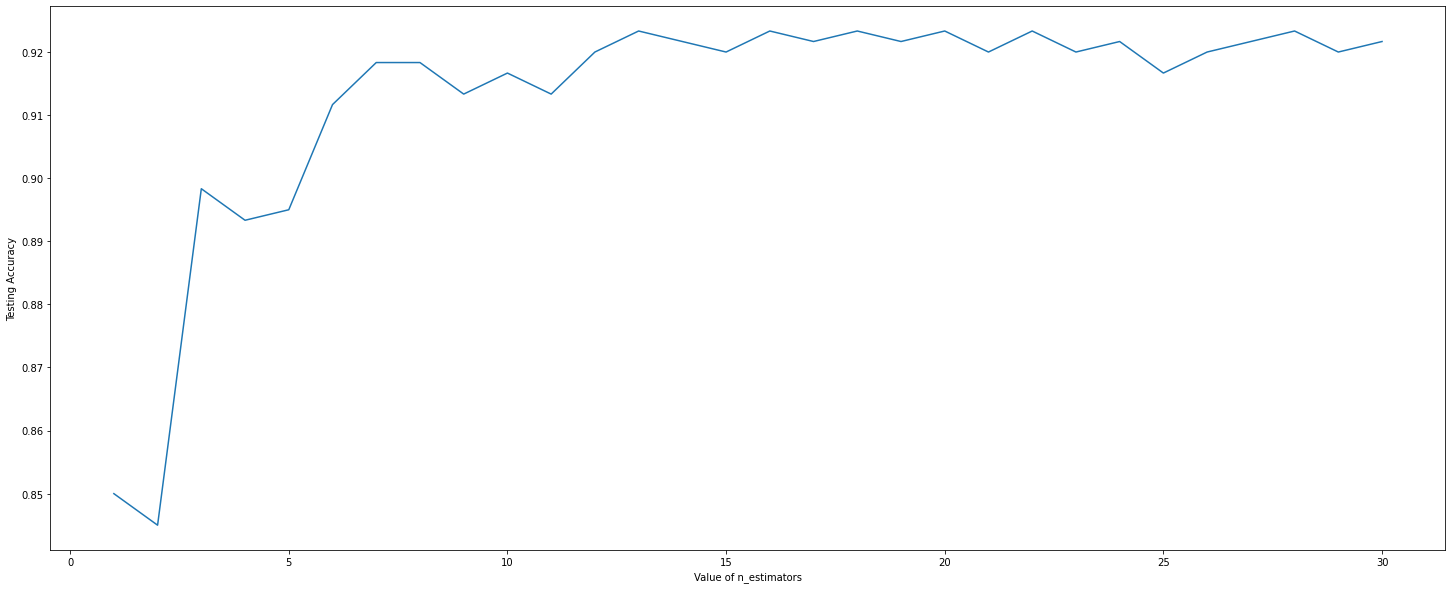

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning <i>max_depth</i>

  3%|▎         | 1/30 [00:00<00:10,  2.67it/s]

1/30 round completed......................... Accurecy: 0.7516666666666667


  7%|▋         | 2/30 [00:00<00:14,  1.98it/s]

2/30 round completed......................... Accurecy: 0.76


 10%|█         | 3/30 [00:01<00:17,  1.59it/s]

3/30 round completed......................... Accurecy: 0.7833333333333333


 13%|█▎        | 4/30 [00:02<00:19,  1.31it/s]

4/30 round completed......................... Accurecy: 0.85


 17%|█▋        | 5/30 [00:03<00:22,  1.14it/s]

5/30 round completed......................... Accurecy: 0.8733333333333333


 20%|██        | 6/30 [00:05<00:24,  1.01s/it]

6/30 round completed......................... Accurecy: 0.8933333333333333


 23%|██▎       | 7/30 [00:06<00:26,  1.14s/it]

7/30 round completed......................... Accurecy: 0.915


 27%|██▋       | 8/30 [00:07<00:27,  1.26s/it]

8/30 round completed......................... Accurecy: 0.9233333333333333


 30%|███       | 9/30 [00:09<00:29,  1.38s/it]

9/30 round completed......................... Accurecy: 0.9316666666666666


 33%|███▎      | 10/30 [00:11<00:29,  1.49s/it]

10/30 round completed......................... Accurecy: 0.93


 37%|███▋      | 11/30 [00:13<00:30,  1.60s/it]

11/30 round completed......................... Accurecy: 0.93


 40%|████      | 12/30 [00:15<00:30,  1.70s/it]

12/30 round completed......................... Accurecy: 0.9266666666666666


 43%|████▎     | 13/30 [00:17<00:30,  1.77s/it]

13/30 round completed......................... Accurecy: 0.9316666666666666


 47%|████▋     | 14/30 [00:19<00:29,  1.82s/it]

14/30 round completed......................... Accurecy: 0.9383333333333334


 50%|█████     | 15/30 [00:21<00:28,  1.87s/it]

15/30 round completed......................... Accurecy: 0.935


 53%|█████▎    | 16/30 [00:23<00:26,  1.91s/it]

16/30 round completed......................... Accurecy: 0.9333333333333333


 57%|█████▋    | 17/30 [00:25<00:25,  1.94s/it]

17/30 round completed......................... Accurecy: 0.9316666666666666


 60%|██████    | 18/30 [00:27<00:23,  1.98s/it]

18/30 round completed......................... Accurecy: 0.9333333333333333


 63%|██████▎   | 19/30 [00:29<00:21,  1.99s/it]

19/30 round completed......................... Accurecy: 0.9266666666666666


 67%|██████▋   | 20/30 [00:31<00:19,  2.00s/it]

20/30 round completed......................... Accurecy: 0.9316666666666666


 70%|███████   | 21/30 [00:33<00:18,  2.00s/it]

21/30 round completed......................... Accurecy: 0.935


 73%|███████▎  | 22/30 [00:35<00:16,  2.01s/it]

22/30 round completed......................... Accurecy: 0.9333333333333333


 77%|███████▋  | 23/30 [00:37<00:14,  2.02s/it]

23/30 round completed......................... Accurecy: 0.9333333333333333


 80%|████████  | 24/30 [00:39<00:12,  2.03s/it]

24/30 round completed......................... Accurecy: 0.9333333333333333


 83%|████████▎ | 25/30 [00:41<00:10,  2.03s/it]

25/30 round completed......................... Accurecy: 0.9333333333333333


 87%|████████▋ | 26/30 [00:43<00:08,  2.03s/it]

26/30 round completed......................... Accurecy: 0.9333333333333333


 90%|█████████ | 27/30 [00:45<00:06,  2.03s/it]

27/30 round completed......................... Accurecy: 0.9333333333333333


 93%|█████████▎| 28/30 [00:47<00:04,  2.02s/it]

28/30 round completed......................... Accurecy: 0.9333333333333333


 97%|█████████▋| 29/30 [00:49<00:02,  2.03s/it]

29/30 round completed......................... Accurecy: 0.9333333333333333


100%|██████████| 30/30 [00:51<00:00,  1.72s/it]

30/30 round completed......................... Accurecy: 0.9333333333333333
The best Depth:
14


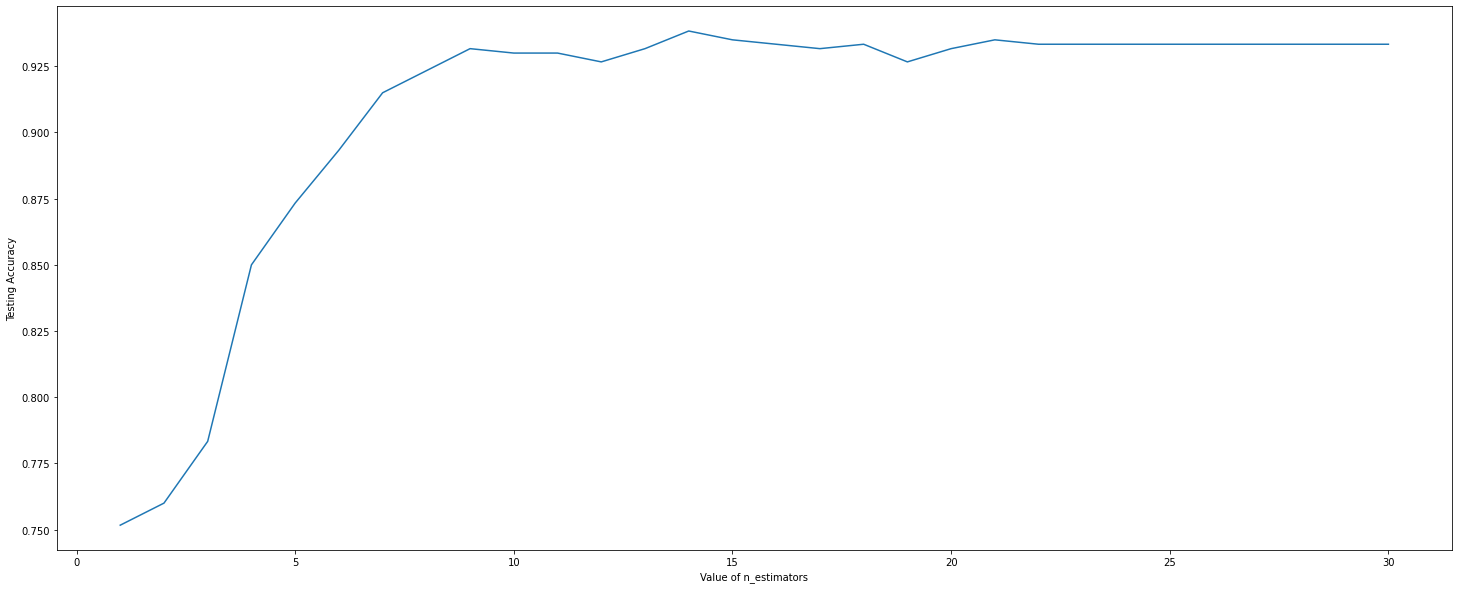

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


##Result for best estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[330  11  10]
 [  6 106   2]
 [ 16   1 118]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       351
           1       0.90      0.93      0.91       114
           2       0.91      0.87      0.89       135

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600

Accurecy:  0.9233333333333333


##Result for best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[330   9  12]
 [  6 107   1]
 [  8   2 125]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       351
           1       0.91      0.94      0.92       114
           2       0.91      0.93      0.92       135

    accuracy                           0.94       600
   macro avg       0.92      0.93      0.93       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.9366666666666666


##Results for best estimator and best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[326  13  12]
 [  9 104   1]
 [ 12   1 122]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       351
           1       0.88      0.91      0.90       114
           2       0.90      0.90      0.90       135

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600

Accurecy:  0.92


#Set the model to be explained and visualization

<font color='coral'>Caution:</font> Please set the <i>trained_model</i> before proceeding

In [ ]:
#trained_model = rf_default
#trained_model = rf_depth
#trained_model = rf_estimator
#trained_model = rf_all

#Visualization

##ROC CURVE

In [ ]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.2 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC_1(model,lebel_dict):

  y_scores = model.predict_proba(X_test)

  y_onehot = pd.get_dummies(y_test, columns=model.classes_)

  fig = go.Figure()
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  for i in range(y_scores.shape[1]):
      y_true = y_onehot.iloc[:, i]
      y_score = y_scores[:, i]

      fpr, tpr, _ = roc_curve(y_true, y_score)
      auc_score = roc_auc_score(y_true, y_score)
      name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
      fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

  fig.update_layout(
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      yaxis=dict(scaleanchor="x", scaleratio=1),
      xaxis=dict(constrain='domain'),
      width=1000, height=1000,
      font=dict(
        family="Courier New, monospace",
        size=20,
        color="BLack"
    ),
    legend=dict(
        x=0.67,
        y=0.05,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
  )
  fig.show()



ploty_ROC_1(trained_model,classes_dict)

#Confusion Matrix

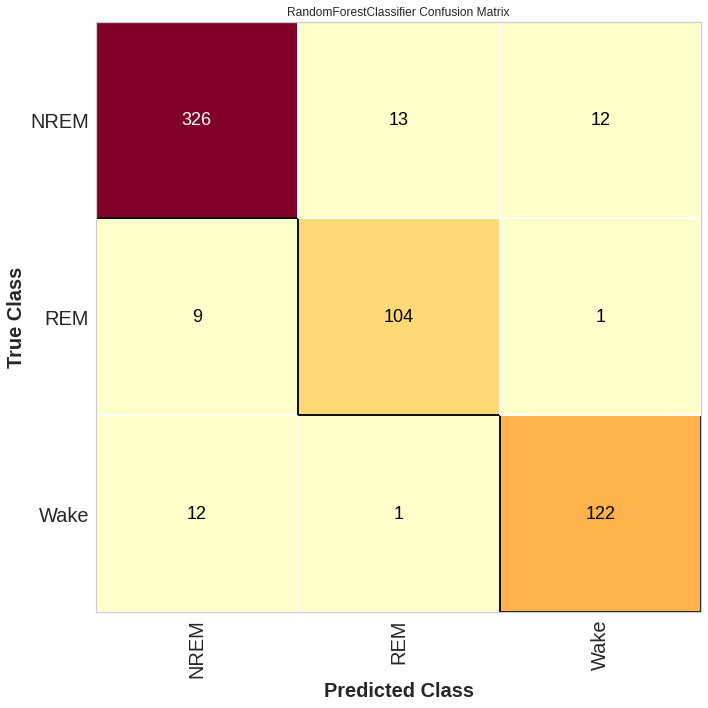

--------------------
--------------------


In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)
      
  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)
  
  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")


attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}


Conf_Mat(X_test,y_test,attributes,trained_model,classes)
     
     

#XAI

##SHAP (SHapley Additive exPlanations)

<font color='coral'> Docmumentation: </font> <a href = "https://shap.readthedocs.io/en/latest/#:~:text=SHAP%20(SHapley%20Additive%20exPlanations)%20is,papers%20for%20details%20and%20citations).">Click Here</a>

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.2 MB/s eta 0:00:00


###Local Explainer

In [ ]:
import shap
shap.initjs()

explainer_local = shap.TreeExplainer(trained_model)

start_index = 1      #set the starting index of the row to be explained
end_index = 10       #set the ending index of the row to be explained


shap_values = explainer_local.shap_values(X_test[start_index:end_index])

In [ ]:
shap.initjs()
# Force plot

shap.force_plot(explainer_local.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names = list_of_feat) # for values

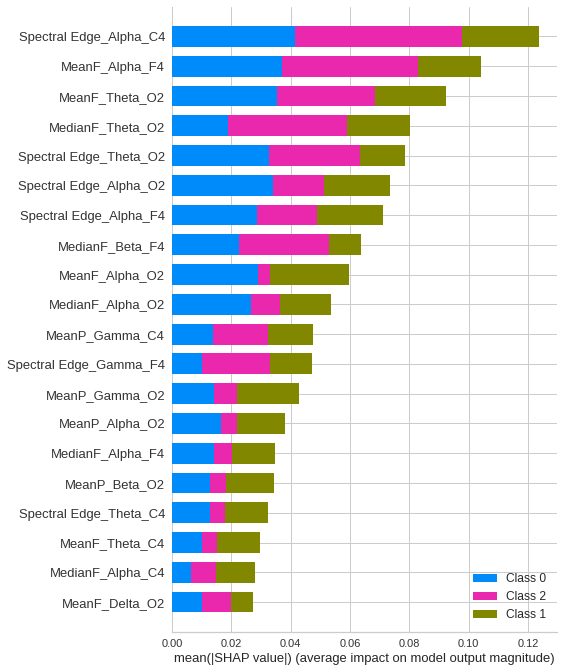

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=list_of_feat)

###Global Explainer

In [ ]:
def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

Models:  RandomForestClassifier(max_depth=14, n_estimators=13)


Permutation explainer: 601it [01:12,  7.50it/s]


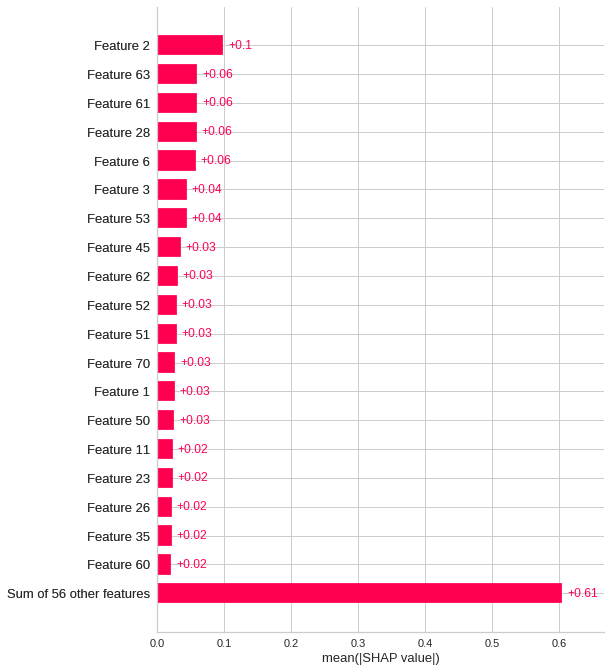

---------------------


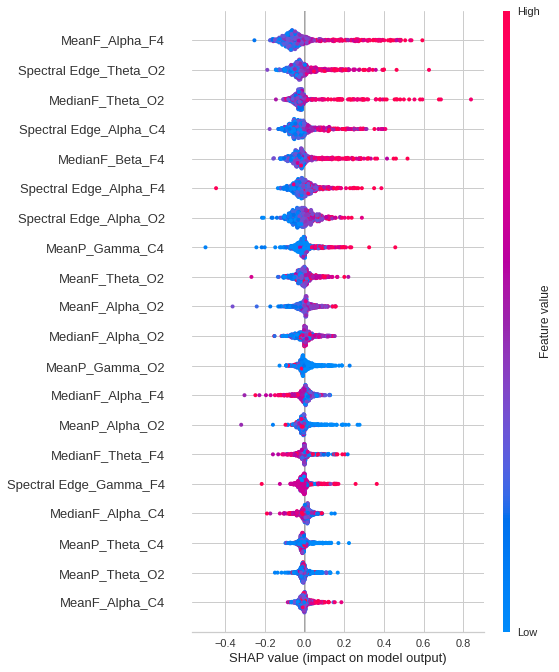

---------------------
Local Explaination


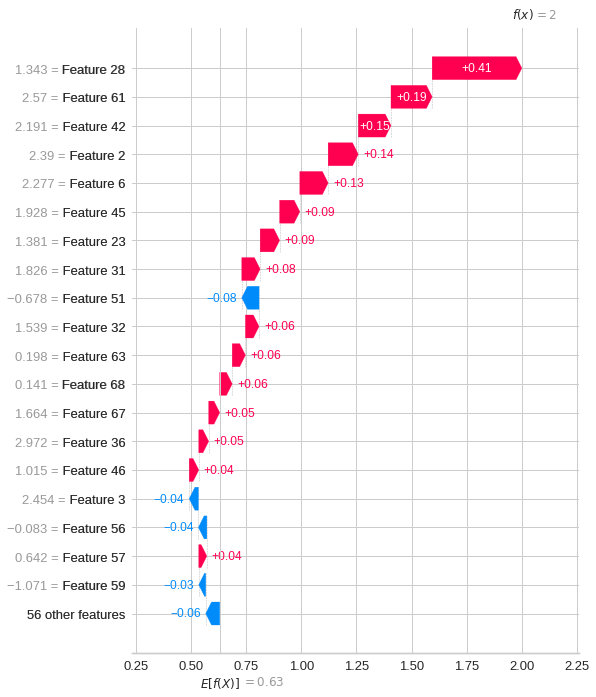

---------------------


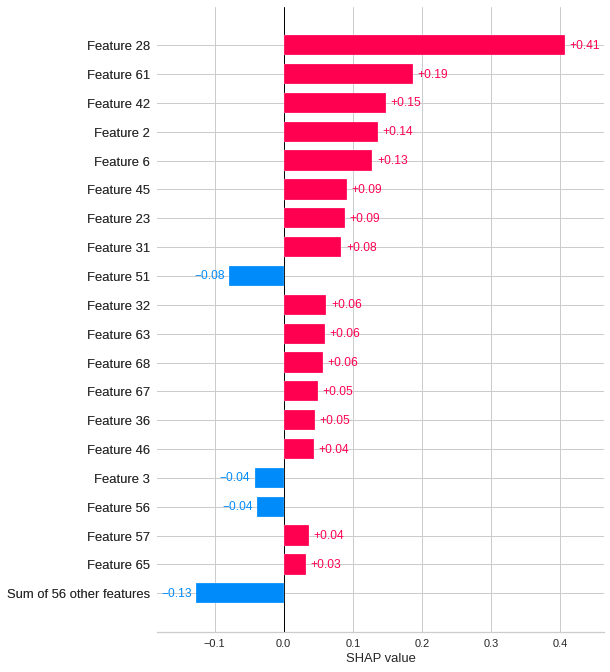

In [ ]:

graph_feat={
    "max_display":20,
    "shap_values Index":2
}


SHAP_EXP(trained_model,graph_feat)
    

##LIME
<font color='coral'> Docmumentation: </font> <a href = "https://pypi.org/project/lime/">Click Here</a>


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=bb3fc195bf1687086fe2929669b22459e78dc1adcac483b8be12467a874c7bb3
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list_of_feat,
    class_names=classes,
    mode='classification'
)

In [ ]:
explain_row = 10

In [ ]:
print("Actual value of test row: ", classes_dict[y_test[explain_row]])

Actual value of test row:  NREM


In [ ]:
exp = explainer.explain_instance(X_test[explain_row],                  #index of row, which will be explained
                                 trained_model.predict_proba,
                                 num_features=6,              # how many features will be explained
                                 top_labels=3)                # number of classes        

exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(trained_model)+"_explanation.html")
     